In [1]:
import os
import cv2
import pickle
import numpy as np
from matplotlib import pyplot as plt
       
   

In [2]:
def tracker_init(img, template, tracker_type_id=2):
    # Let's assume the detector has detected a vehicle
    x1, y1 = template[0][0], template[0][1]
    x2, y2 = template[1][0], template[1][1]
    width = x2 - x1
    height = y2 - y1

    # Set up tracker
    tracker_types = ['MIL','KCF', 'CSRT']
    tracker_type = tracker_types[tracker_type_id]

    if tracker_type == 'MIL':
        tracker = cv2.TrackerMIL_create()

    if tracker_type == 'KCF':
        tracker = cv2.TrackerKCF_create()

    if tracker_type == "CSRT":
        tracker = cv2.TrackerCSRT_create()

    # Initialize tracker
    bbox = (x1, y1, width, height)
    ok = tracker.init(img, bbox)
    return tracker


def tracker_update(tracker, img):
        ok, bbox = tracker.update(img)
        print(ok, bbox)
        x1, y1 = bbox[0], bbox[1]
        width, height = bbox[2], bbox[3]
        return x1, y1, x1+width, y1+height

    

In [3]:
def tracker_demo(tracker_type_id):
    cap = cv2.VideoCapture('../data/video.mp4')
    if not cap.isOpened():
        print("Failed to open video")

    template = ((295, 85), (415, 170))
    ret, frame = cap.read()
    tracker = tracker_init(frame, template, tracker_type_id)

    cv2.rectangle(frame, template[0], template[1], (0, 255, 0), 2)
    plt.imshow(frame)
    plt.show(), plt.draw()

    i = 0
    while True:
        i += 1
        if i > 100:
            break

        ret, frame = cap.read()
        if not ret:
            break

        if i % 10 == 0:
            x1, y1, x2, y2 = tracker_update(tracker, frame)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            plt.imshow(frame)
            plt.show(), plt.draw()
    
    



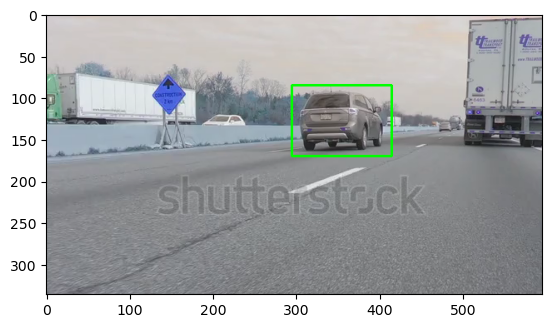

True (320, 91, 107, 75)


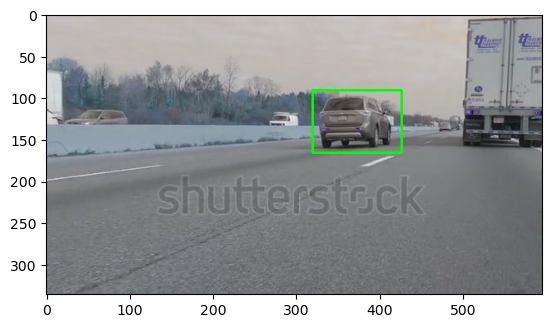

True (339, 95, 97, 68)


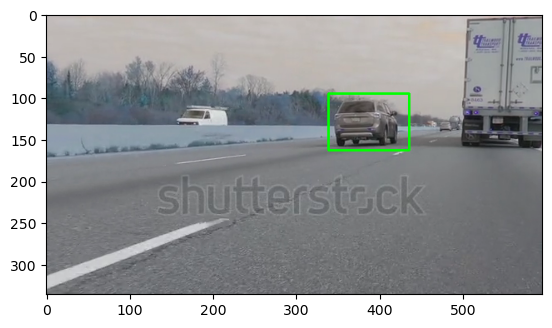

True (349, 94, 98, 70)


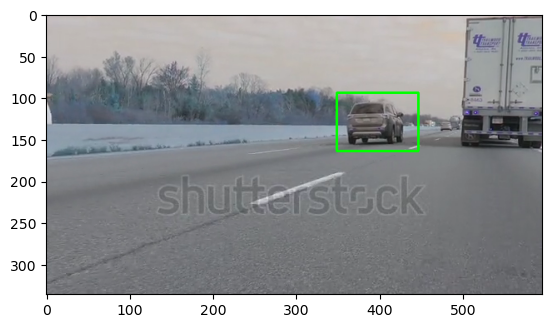

True (363, 96, 97, 68)


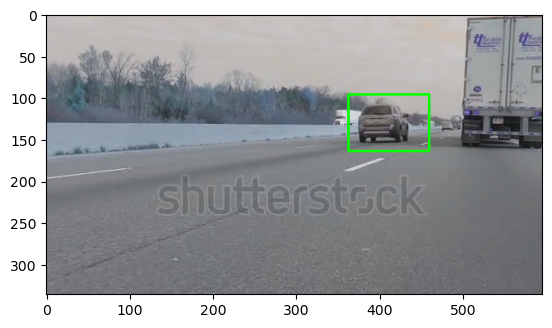

True (374, 94, 98, 70)


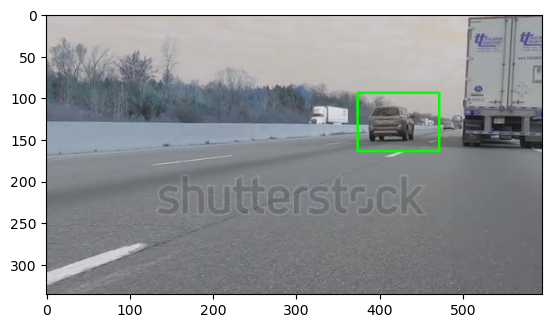

True (384, 92, 102, 73)


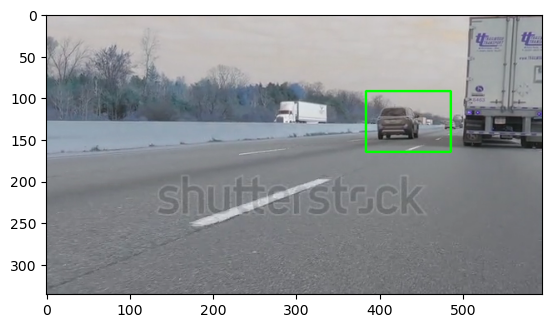

True (396, 87, 100, 71)


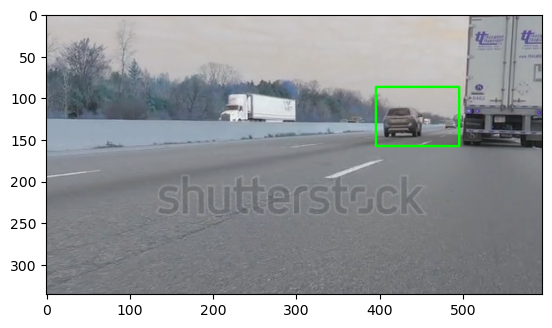

True (402, 84, 98, 70)


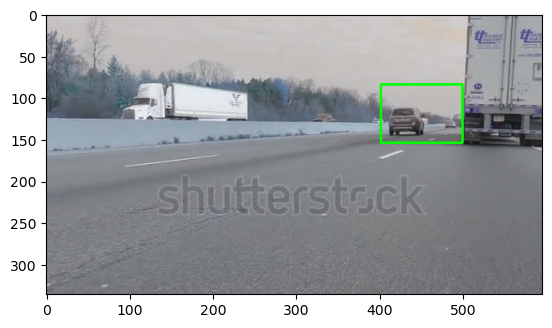

True (487, 68, 100, 71)


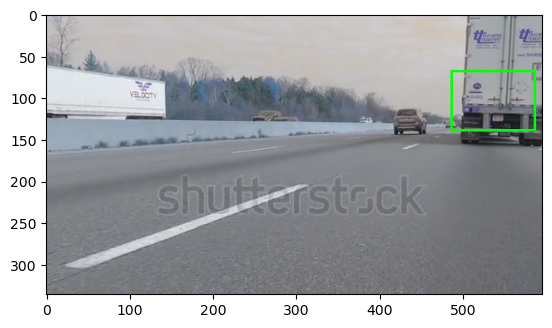

True (492, 71, 97, 68)


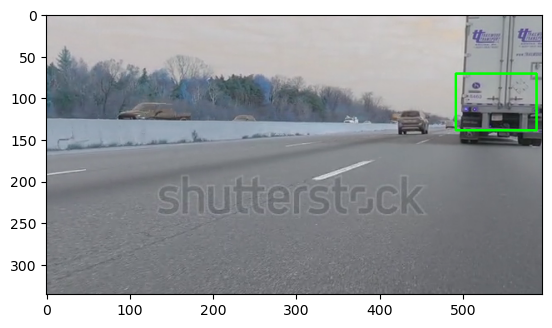

<Figure size 640x480 with 0 Axes>

In [4]:
tracker_demo(2)

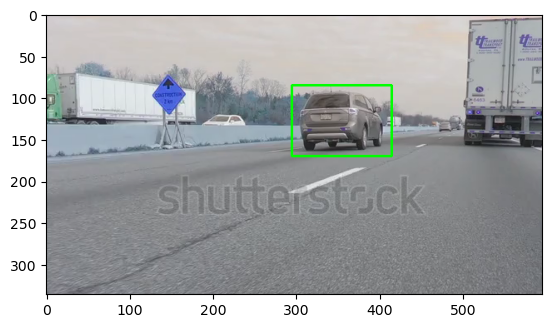

True (295, 85, 120, 85)


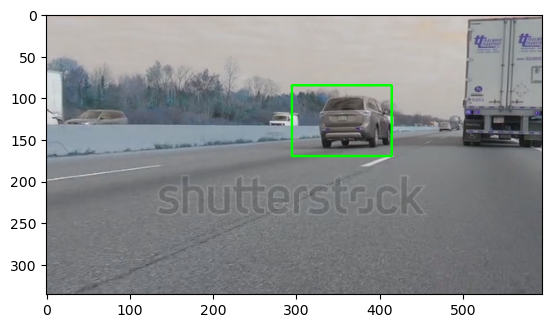

True (309, 86, 120, 85)


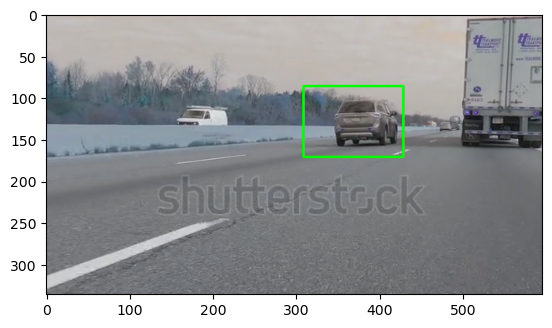

True (325, 85, 120, 85)


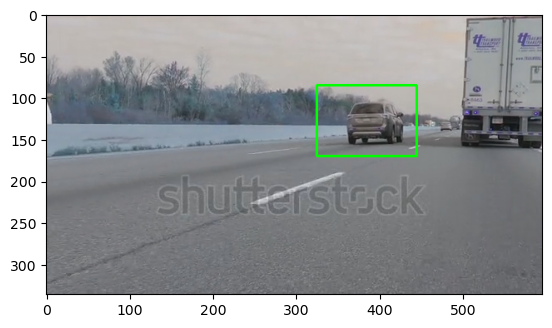

True (343, 82, 120, 85)


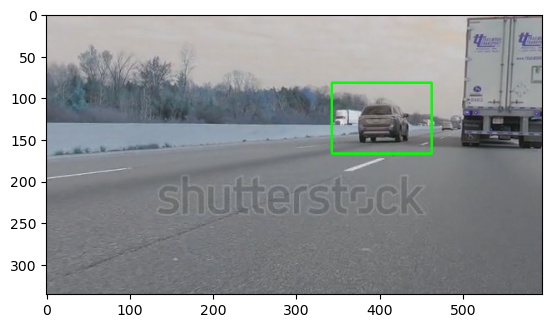

True (347, 83, 120, 85)


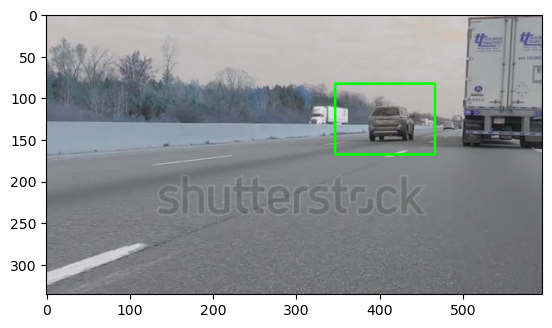

True (359, 86, 120, 85)


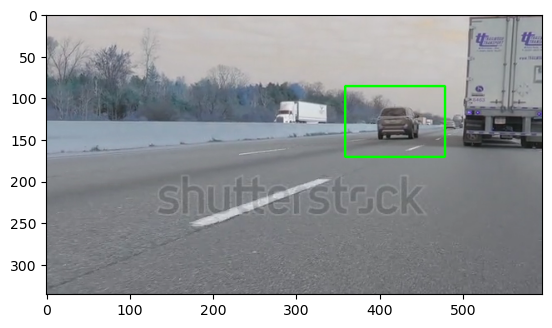

True (367, 85, 120, 85)


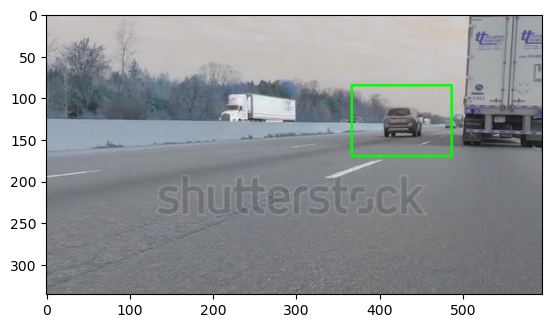

False (0, 0, 0, 0)


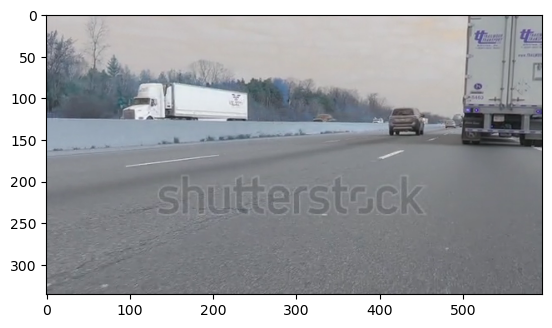

False (0, 0, 0, 0)


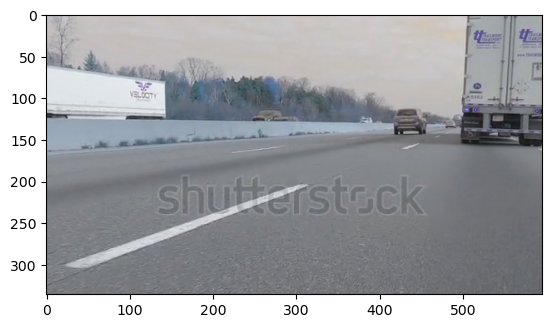

False (0, 0, 0, 0)


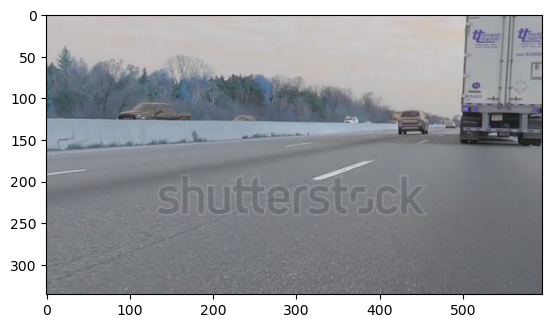

<Figure size 640x480 with 0 Axes>

In [5]:
tracker_demo(1)

Compare the results:
* Do you see any differences? If so, what are they?
* Does one tracker perform better than the other? In what way?

CSRT учитивает маштаб соответсвенно он лучше, KCF виглядит точнее
